In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter, OrderedDict
from datetime import datetime
print(os.listdir("../input"))

In [2]:
data = pd.read_csv("../input/imbd-sf/data.csv'")
data.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


In [3]:
len(data)

1890

# Предобработка датасета

In [4]:
answer_ls = [] # создадим список с ответами. сюда будем добавлять ответы по мере прохождения теста

# сюда можем вписать создание новых колонок в датасете

# Прибыль/убыль фильма
data['profit'] = data['revenue'] - data['budget']

# Определяет, является ли фильм прибыльным
data['profit_is_not_loss'] = None
for i, profit in enumerate(data['profit']):
    data['profit_is_not_loss'][i] = True if (profit > 0) else False
data[['profit', 'profit_is_not_loss']]

# Месяц релиза фильма
data['release_month'] = data['release_date']
data_dates = data['release_month']
for i, date in enumerate(data_dates):
    data_dates[i] = str(datetime.strptime(date, '%m/%d/%Y').month)

# Кол-во символов в названии (включая пробелы)
data['title_letter_count'] = data['original_title']
data_titles = data['title_letter_count']
for i, title in enumerate(data_titles):
    data_titles[i] = len(title)
    
# Кол-во слов в названии (под словами подразумеваются срезы строк, разделенные пробелами)
data['title_word_count'] = data['original_title']
data_titles = data['title_word_count']
for i, title in enumerate(data_titles):
    data_titles[i] = len(title.split(' '))

C:\Users\Artyom\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Artyom\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Artyom\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Artyom\Anaconda3\lib\site-package

# Функции

In [5]:
sort_for_sec = lambda x: x[1] # Сортирование по второму атрибуту внутри списка (кортежа)

def true_values_percent(data_list):
    """Считает кол-во истинных значений (для последнего задания)"""
    values_counter = Counter()
    for value in data_list:
        values_counter[value] += 1
    return values_counter[True] / len(data_list)

def value_contains_counter(ds, column_name, func=False):
    """Создает счетчик вхождения значений, разделенных '|' (или без разделения), и по дополнительному 
    условию (по умолчанию доп. условие отключено)"""
    all_values_set = get_all_column_values(ds, column_name)
    value_in_data_counter = dict() # Метод Counter тут не поддерживает сортировку
    for value in all_values_set:
        if func == False:
            value_in_data_counter[value] = len(data[data[column_name].str.contains(value)])
        else:
            value_in_data_counter[value] = len(data[(data[column_name].str.contains(value)) & ((func)(data))])
    value_in_data_counter = sorted(value_in_data_counter.items(), key=sort_for_sec, reverse=True)
    return list(value_in_data_counter)

def get_all_column_values(ds, column_name):
    """Принимает датасет и название столбза из датасета, в котором значения 
    разделены знаком '|' (или без разделения), и возвращает список всех значений, содержащихся в 
    указанном столбце"""
    all_values_set = set()
    for values in ds[column_name]:
        values_list = values.split('|')
        for value in values_list:
            all_values_set.add(value)
    return list(all_values_set)

# Константы

In [6]:
# Ср.знач бюджета
BUDGET_MEAN = data['budget'].mean()

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. The Warrior's Way	(tt1032751)
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [7]:
ans_1 = data.sort_values(['budget'], ascending=False).head(1)
display(ans_1['original_title'])

491    The Warrior's Way
Name: original_title, dtype: object

In [8]:
# тут вводим ваш ответ и добавлем в его список ответов (сейчас для примера стоит "1")
answer_ls.append(4)

# 2. Какой из фильмов самый длительный (в минутах)
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. Gods and Generals	(tt0279111)
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [9]:
ans_2 = data.sort_values(['runtime'], ascending=False).head(1)
display(ans_2['original_title'])

1158    Gods and Generals
Name: original_title, dtype: object

In [10]:
answer_ls.append(2)

# 3. Какой из фильмов самый короткий (в минутах)
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. Winnie the Pooh	tt1449283
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536

In [11]:
ans_3 = data.sort_values(['runtime']).head(1)
display(ans_3['original_title'])

769    Winnie the Pooh
Name: original_title, dtype: object

In [12]:
answer_ls.append(3)

# 4. Средняя длительность фильма?


Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [13]:
ans_4 = data['runtime'].mean()
display(ans_4)

109.65343915343915

In [14]:
answer_ls.append(2)

# 5. Средняя длительность фильма по медиане?
Варианты ответов:
1. 106
2. 112
3. 101
4. 120
5. 115




In [15]:
ans_5 = data['runtime'].median()
display(ans_5)

106.5

In [16]:
answer_ls.append(1)

# 6. Какой самый прибыльный фильм?
Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. Avatar	tt0499549

In [17]:
ans_6 = data.sort_values('profit', ascending=False)[['original_title', 'profit']].head(1)
ans_6

,original_title,profit
239,Avatar,2544505847


In [18]:
answer_ls.append(5)

# 7. Какой фильм самый убыточный?
Варианты ответов:
1. Supernova tt0134983
2. The Warrior's Way tt1032751
3. Flushed Away	tt0424095
4. The Adventures of Pluto Nash	tt0180052
5. The Lone Ranger	tt1210819

In [19]:
ans_7 = data.sort_values('profit', ascending=True)[['original_title', 'profit']].head(1)
display(ans_7)

,original_title,profit
491,The Warrior's Way,-413912431


In [20]:
answer_ls.append(2)

# 8. Сколько всего фильмов в прибыли?
Варианты ответов:
1. 1478
2. 1520
3. 1241
4. 1135
5. 1398


In [21]:
ans_8 = len(data[data['profit_is_not_loss']])
display(ans_8)

1478

In [22]:
answer_ls.append(1)

# 9. Самый <del>прибыльный</del> кассовый фильм в 2008 году?
<strong><font  color="red">Примечание. Под кассовым я понимаю колонку 'revenue', отражающую кассовые сборы фильма. Самый кассовый и самый прибыльный фильм по сборам не отличаются</font></strong>

Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. The Dark Knight	tt0468569
5. Mamma Mia!	tt0795421

In [23]:
display(data[(data['release_year'] == 2008)].sort_values('profit', ascending=False).head(1))
ans_9 = data[(data['release_year'] == 2008)].sort_values('revenue', ascending=False).head(1)
display(ans_9)

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_is_not_loss,release_month,title_letter_count,title_word_count
600,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,...,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/2008,8432,8.1,2008,816921825,True,7,15,3


,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_is_not_loss,release_month,title_letter_count,title_word_count
600,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,...,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/2008,8432,8.1,2008,816921825,True,7,15,3


In [24]:
answer_ls.append(4)

# 10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. The Lone Ranger	tt1210819


In [25]:
ans_10 = data[(data['release_year'] <= 2014) & (data['release_year'] >= 2012)].sort_values('profit').head(1)
display(ans_10)

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_is_not_loss,release_month,title_letter_count,title_word_count
1246,tt1210819,1.21451,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,...,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,1607,6.0,2013,-165710090,False,7,15,3


In [26]:
answer_ls.append(5)

# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. Drama
4. Comedy
5. Thriller

In [27]:
genre_top = value_contains_counter(data, 'genres', func=False)
display(genre_top)
ans_11 = genre_top[0]
display(ans_11)

[('Drama', 782),
 ('Comedy', 683),
 ('Thriller', 597),
 ('Action', 583),
 ('Adventure', 416),
 ('Crime', 315),
 ('Romance', 308),
 ('Family', 260),
 ('Science Fiction', 248),
 ('Fantasy', 223),
 ('Horror', 176),
 ('Mystery', 168),
 ('Animation', 139),
 ('Music', 64),
 ('History', 62),
 ('War', 58),
 ('Western', 20),
 ('Documentary', 8),
 ('Foreign', 2)]

('Drama', 782)

In [28]:
answer_ls.append(3)

# 12. Какого жанра среди прибыльных фильмов больше всего?
Варианты ответов:
1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure

In [29]:
genre_profit_top = value_contains_counter(data, 'genres', func=lambda data: data['budget'] < data['revenue'])
display(genre_profit_top)
ans_12 = genre_profit_top[0]
display(ans_12)

[('Drama', 560),
 ('Comedy', 551),
 ('Thriller', 446),
 ('Action', 444),
 ('Adventure', 337),
 ('Romance', 242),
 ('Crime', 231),
 ('Family', 226),
 ('Science Fiction', 195),
 ('Fantasy', 188),
 ('Horror', 150),
 ('Animation', 120),
 ('Mystery', 119),
 ('Music', 47),
 ('History', 46),
 ('War', 41),
 ('Western', 12),
 ('Documentary', 7),
 ('Foreign', 0)]

('Drama', 560)

In [30]:
answer_ls.append(1)

# 13. Кто из режиссеров снял больше всего фильмов?
Варианты ответов:
1. Steven Spielberg
2. Ridley Scott 
3. Steven Soderbergh
4. Christopher Nolan
5. Clint Eastwood

In [31]:
director_contains_counter = value_contains_counter(data, 'director')
for i, director in enumerate(director_contains_counter):
    if director[0] in ['Steven Spielberg', 'Ridley Scott', 'Steven Soderbergh', 'Christopher Nolan', 'Clint Eastwood']:
        print('{}: '.format(director[0]), director[1])
ans_13 = 'Steven Soderbergh'

Steven Soderbergh:  13
Clint Eastwood:  12
Ridley Scott:  12
Steven Spielberg:  10
Christopher Nolan:  8


In [32]:
answer_ls.append(3)

# 14. Кто из режиссеров снял больше всего Прибыльных фильмов?
Варианты ответов:
1. Steven Soderbergh
2. Clint Eastwood
3. Steven Spielberg
4. Ridley Scott
5. Christopher Nolan

In [33]:
director_profit_contains_counter = value_contains_counter(data, 'director', func=lambda data: data['profit_is_not_loss'])
for i, director in enumerate(director_profit_contains_counter):
    if director[0] in ['Steven Spielberg', 'Ridley Scott', 'Steven Soderbergh', 'Christopher Nolan', 'Clint Eastwood']:
        print('{}: '.format(director[0]), director[1])
ans_14 = 'Steven Soderbergh'

Ridley Scott:  12
Clint Eastwood:  10
Steven Spielberg:  10
Steven Soderbergh:  10
Christopher Nolan:  8


In [34]:
# Метод решения через groupby
data[data['profit_is_not_loss']].groupby(['director'])['profit'].count().sort_values(ascending=False).head(5)

director
Ridley Scott         12
Steven Spielberg     10
Steven Soderbergh    10
Clint Eastwood       10
Shawn Levy            9
Name: profit, dtype: int64

In [35]:
answer_ls.append(4)

# 15. Кто из режиссеров принес больше всего прибыли?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. Peter Jackson


'Peter Jackson'

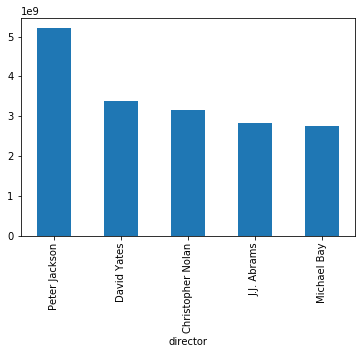

In [36]:
display(data.groupby(['director'])['profit'].sum().sort_values(ascending=False).head(5).plot(kind = 'bar'))
ans_15 = 'Peter Jackson'
display(ans_15)

In [37]:
answer_ls.append(5)

# 16. Какой актер принес больше всего прибыли?
Варианты ответов:
1. Emma Watson
2. Johnny Depp
3. Michelle Rodriguez
4. Orlando Bloom
5. Rupert Grint

In [38]:
actors = get_all_column_values(data, 'cast')
actors_profit = {}
for actor in actors:
    if actor in ['Emma Watson', 'Johnny Depp', 'Michelle Rodriguez', 'Orlando Bloom', 'Rupert Grint']:
        actors_profit[actor] = data[data['cast'].str.contains(actor)]['profit'].sum()
ans_16 = sorted(actors_profit.items(), key=sort_for_sec, reverse=True)[0]
display(ans_16)

('Emma Watson', 6666245597)

In [39]:
answer_ls.append(1)

# 17. Какой актер принес меньше всего прибыли в 2012 году?
Варианты ответов:
1. Nicolas Cage
2. Danny Huston
3. Kirsten Dunst
4. Jim Sturgess
5. Sami Gayle

In [40]:
actors_loss = {}
for actor in actors:
    if actor in ['Nicolas Cage', 'Danny Huston', 'Kirsten Dunst', 'Jim Sturgess', 'Sami Gayle']:
        actors_loss[actor] = data[(data['cast'].str.contains(actor)) & (data['release_year'] == 2012)]['profit'].sum()
ans_17 = sorted(actors_loss.items(), key=sort_for_sec, reverse=False)[0]
display(ans_17)

('Kirsten Dunst', -68109207)

In [41]:
answer_ls.append(3)

# 18. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Adam Sandler

In [42]:
actors_high_budget = {}
for actor in actors:
    if actor in ['Tom Cruise', 'Mark Wahlberg', 'Matt Damon', 'Angelina Jolie', 'Adam Sandler']:
        actors_high_budget[actor] = len(data[(data['cast'].str.contains(actor)) & (data['budget'] > BUDGET_MEAN)])
ans_18 = sorted(actors_high_budget.items(), key=sort_for_sec, reverse=True)[0]
display(ans_18)

('Matt Damon', 18)

In [43]:
answer_ls.append(3)

# 19. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [44]:
genres = get_all_column_values(data, 'genres')
nicolas_cage_genres_counter = Counter()
for genre in genres:
    nicolas_cage_genres_counter[genre] = len(data[(data['cast'].str.contains('Nicolas Cage')) & (data['genres'].str.contains(genre))])
ans_19 = sorted(nicolas_cage_genres_counter.items(), key=sort_for_sec, reverse=True)[0]
display(ans_19)

('Action', 17)

In [45]:
answer_ls.append(2)

# 20. Какая студия сняла больше всего фильмов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [46]:
# Список всех студий
studios = get_all_column_values(data, 'production_companies')
sorted(studios)

['"DIA" Productions GmbH & Co. KG',
 '11:11 Mediaworks',
 '1492 Pictures',
 '1984 Private Defense Contractors',
 '2 Entertain',
 '20th Century Fox',
 '20th Century Fox Home Entertainment',
 '21 Laps Entertainment',
 '26 Films',
 '2929 Productions',
 '2S Films',
 '3 Arts Entertainment',
 '3 in the Box',
 '360 Pictures',
 '3Foot7',
 '3L Filmverleih',
 '40 Acres & A Mule Filmworks',
 '4M',
 '5150 Action',
 '80 Days Productions',
 '87Eleven',
 '8:38 Productions',
 '98 MPH Productions',
 'A Band Apart',
 'A Hot Dog',
 'A&E Television Networks',
 'A113',
 'A24',
 'AFG Talons Productions',
 'ANA Media',
 'AR Films',
 'AR-TL',
 'ARD Degeto Film',
 'ARP SÃ©lection',
 'ASAF',
 'AZL Productions KG',
 'Aardman Animations',
 'Abandon Entertainment',
 'Abraham Productions',
 'Achte Babelsberg Film',
 'Ad Hominem Enterprises',
 'Adam Schroeder Productions',
 'Aegis Film Fund',
 'Affirm Films',
 'After Dark Films',
 'Agencja Produkcji Filmowej',
 'Aggregate Films',
 'Ahimsa Films',
 'Akil Production C

In [47]:
studios_1 = ['Universal Pictures', 'Paramount Pictures', 'Columbia Pictures', 'Warner Bros.', 'Twentieth Century Fox Film Corporation']
studio_films_counter = []

for studio in studios_1:
    if studio != 'Universal Pictures':
        studio_films_counter.append([studio, len(data[~(data['production_companies'].str.contains('{} '.format(studio))) & (data['production_companies'].str.contains(studio))])])
    else:
        studio_films_counter.append(('Universal Pictures (Universal)', len(data[~(data['production_companies'].str.contains('Universal Pictures ')) & (data['production_companies'].str.contains('Universal Pictures'))]) + len(data[data['production_companies'].str.contains('Universal\|')])))
# display(studio_films_counter)
ans_20 = sorted(studio_films_counter, key=sort_for_sec, reverse=True)[0]
ans_20

('Universal Pictures (Universal)', 175)

In [48]:
answer_ls.append(1)

# 21. Какая студия сняла больше всего фильмов в 2015 году?
Варианты ответа:
1. Universal Pictures
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [49]:
studios_2 = ['Universal Pictures', 'Paramount Pictures', 'Columbia Pictures', 'Warner Bros.', 'Twentieth Century Fox Film Corporation']
studio_films_2015_counter = []

for studio in studios_2:
    if studio != 'Universal Pictures':
        studio_films_2015_counter.append([studio, len(data[~(data['production_companies'].str.contains('{} '.format(studio))) & (data['production_companies'].str.contains(studio)) & (data['release_year'] == 2015)])])
    else:
        studio_films_2015_counter.append(['Universal Pictures (Universal)', len(data[~(data['production_companies'].str.contains('Universal Pictures ')) & (data['production_companies'].str.contains('Universal Pictures')) & (data['release_year'] == 2015)]) + len(data[(data['production_companies'].str.contains('Universal\|') & (data['release_year'] == 2015))])])
# display(studio_films_2015_counter)
ans_21 = sorted(studio_films_2015_counter, key=sort_for_sec, reverse=True)[0]
ans_21

['Warner Bros.', 12]

In [50]:
answer_ls.append(4)

# 22. Какая студия заработала больше всего денег в жанре комедий за все время?
Варианты ответа:
1. Warner Bros
2. Universal Pictures (Universal)
3. Columbia Pictures
4. Paramount Pictures
5. Walt Disney

In [51]:
studios_3 = ['Warner Bros.', 'Universal Pictures', 'Columbia Pictures', 'Paramount Pictures', 'Walt Disney']
studio_films_comedy_profit = []

for studio in studios_3:
    if studio != 'Universal Pictures':
        studio_films_comedy_profit.append([studio, data[~(data['production_companies'].str.contains('{} '.format(studio))) & (data['production_companies'].str.contains(studio)) & (data['genres'].str.contains('Comedy'))]['profit'].sum()])
    else:
        studio_films_comedy_profit.append(['Universal Pictures (Universal)', data[~(data['production_companies'].str.contains('Universal Pictures ')) & (data['production_companies'].str.contains('Universal Pictures')) & (data['genres'].str.contains('Comedy'))]['profit'].sum() + data[(data['production_companies'].str.contains('Universal\|') & (data['genres'].str.contains('Comedy')))]['profit'].sum()])
# display(studio_films_comedy_profit)
ans_22 = sorted(studio_films_comedy_profit, key=sort_for_sec, reverse=True)[0]
ans_22

['Universal Pictures (Universal)', 8961545581]

In [52]:
answer_ls.append(2)

# 23. Какая студия заработала больше всего денег в 2012 году?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Columbia Pictures
4. Paramount Pictures
5. Lucasfilm

In [53]:
studios_4 = ['Universal Pictures', 'Warner Bros.', 'Columbia Pictures', 'Paramount Pictures', 'Lucasfilm']
studio_films_2012_profit = []

for studio in studios_4:
    if studio != 'Universal Pictures':
        studio_films_2012_profit.append([studio, data[~(data['production_companies'].str.contains('{} '.format(studio))) & (data['production_companies'].str.contains(studio)) & (data['release_year'] == 2012)]['profit'].sum()])
    else:
        studio_films_2012_profit.append(['Universal Pictures (Universal)', data[~(data['production_companies'].str.contains('Universal Pictures ')) & (data['production_companies'].str.contains('Universal Pictures')) & (data['release_year'] == 2012)]['profit'].sum() + data[(data['production_companies'].str.contains('Universal\|') & (data['release_year'] == 2012))]['profit'].sum()])
# display(studio_films_2012_profit)
ans_23 = sorted(studio_films_2012_profit, key=sort_for_sec, reverse=True)[0]
ans_23

['Columbia Pictures', 2501406608]

In [54]:
answer_ls.append(3)

# 24. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [55]:
paramount_loss_film = data[data['production_companies'].str.contains('Paramount Pictures')][['imdb_id', 'original_title', 'production_companies', 'profit']].sort_values(['profit']).head(1)
ans_24 = paramount_loss_film['original_title']
display(ans_24)

926    K-19: The Widowmaker
Name: original_title, dtype: object

In [56]:
answer_ls.append(1)

# 25. Какой Самый прибыльный год (заработали больше всего)?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [57]:
profit_years = data.groupby(['release_year'])['profit'].sum().sort_values(ascending=False)
ans_25 = profit_years.head(1)
display(ans_25)

release_year
2015    18668572378
Name: profit, dtype: int64

In [58]:
answer_ls.append(5)

# 26. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2010
5. 2015

In [59]:
warnerbros_profit_years = data[data['production_companies'].str.contains('Warner Bros')].groupby(['release_year'])['profit'].sum().sort_values(ascending=False)
ans_26 = warnerbros_profit_years.head(1)
display(ans_26)

release_year
2014    2295464519
Name: profit, dtype: int64

In [60]:
answer_ls.append(1)

# 27. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [61]:
release_num_months = data.groupby(['release_month'])['imdb_id'].nunique().sort_values(ascending=False)
ans_27 = release_num_months.head(1)
display(ans_27)

release_month
9    227
Name: imdb_id, dtype: int64

In [62]:
answer_ls.append(4)

# 28. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [63]:
data_mounth_groups = data.groupby(['release_month'])['imdb_id'].nunique().sort_values()
ans_28 = data_mounth_groups[['6', '7', '8']].sum()
display(ans_28)

450

In [64]:
answer_ls.append(2)

# 29. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Clint Eastwood
4. Ridley Scott
5. Peter Jackson

In [65]:
data_mounth_groups = data[(data['release_month'] == '12') | (data['release_month'] == '1') | (data['release_month'] == '2')].groupby(['director'])['imdb_id'].nunique().sort_values().reset_index()
winter_directors = ['Steven Soderbergh', 'Christopher Nolan', 'Clint Eastwood', 'Ridley Scott', 'Peter Jackson']
for director in winter_directors:
    display(data_mounth_groups[data_mounth_groups['director'].str.contains(director)])
ans_29 = 'Peter Jackson'

,director,imdb_id
330,Steven Soderbergh,6


,director,imdb_id


,director,imdb_id
331,Clint Eastwood,6


,director,imdb_id
323,Ridley Scott,3


,director,imdb_id
332,Peter Jackson,7


In [66]:
answer_ls.append(5)

# 30. Какой месяц чаще всего по годам самый прибыльный?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [67]:
data_month_and_year_profit = data.groupby(['release_month', 'release_year'])['profit'].sum().reset_index()
top_months_counter = Counter()
for i in range(2000, 2016):
    top_months_counter[data_month_and_year_profit[data_month_and_year_profit['release_year'] == i].sort_values(['profit'], ascending=False).head(1)['release_month'].max()] += 1
ans_30 = sorted(top_months_counter.most_common(), key=sort_for_sec, reverse=True)[0][0]
display(ans_30)

'6'

In [68]:
answer_ls.append(2)

# 31. Названия фильмов какой студии в среднем самые длинные по количеству символов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [69]:
company_long_letter_title = []
for production_company in ('Universal Pictures', 'Warner Bros', 'Jim Henson Company, The', 'Paramount Pictures', 'Four By Two Productions'):
    company_long_letter_title.append((production_company, data[(data['production_companies'].str.contains(production_company))]['title_letter_count'].mean()))
ans_31 = sorted(company_long_letter_title, key=sort_for_sec, reverse=True)[0][0]
display(ans_31)

'Four By Two Productions'

In [70]:
answer_ls.append(5)

# 32. Названия фильмов какой студии в среднем самые длинные по количеству слов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [71]:
company_long_word_title = []
for production_company in ('Universal Pictures', 'Warner Bros', 'Jim Henson Company, The', 'Paramount Pictures', 'Four By Two Productions'):
    company_long_word_title.append((production_company, data[(data['production_companies'].str.contains(production_company))]['title_word_count'].mean()))
ans_32 = sorted(company_long_word_title, key=sort_for_sec, reverse=True)[0][0]
display(ans_32)

'Four By Two Productions'

In [72]:
answer_ls.append(5)

# 33. Сколько разных слов используется в названиях фильмов?(без учета регистра)
Варианты ответа:
1. 6540
2. 1002
3. 2461
4. 28304
5. 3432

In [73]:
# 33. Сколько разных слов используется в названиях фильмов (без учета регистра)?
pattern = re.compile('\w+')
words_set = set()
for title in data['original_title'].values:
    title_list = title.split(' ')
    for word in title_list:
        word = word.lower()
        words_set.add(word)
len(words_set)

2462

In [74]:
answer_ls.append(3)

# 34. Какие фильмы входят в 1 процент лучших по рейтингу?
Варианты ответа:
1. Inside Out, Gone Girl, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. <del>The Lord of the Rings: The Return of the King</del> The Lord of the Rings: The Return of the King, Upside Down
4. 300, Lucky Number Slevin
5. <strong>Upside Down, 300, Inside Out, The Lord of the Rings: The Return of the King</strong> (вариант ответа отсуствовал в ноутбуке)

In [75]:
top1_num = int(len(data) * 0.01)
data_top1 = data.sort_values(['vote_average'], ascending=False).head(top1_num)
data_top1['original_title']
ans_34 = 'Inside Out, Gone Girl, 12 Years a Slave'

In [76]:
answer_ls.append(1)

# 35. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Hugh Jackman & Ian McKellen
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [77]:
# 35. Какие актёры чаще всего снимаются в одном фильме вместе?
actor_pairs = [['Johnny Depp', 'Helena Bonham Carter'], ['Hugh Jackman', 'Ian McKellen'], ['Vin Diesel', 'Paul Walker'], ['Adam Sandler', 'Kevin James'], ['Daniel Radcliffe', 'Rupert Grint']]
actor_pairs_counter = []
for actor_1, actor_2 in actor_pairs:
    actor_pairs_counter.append(('{0} and {1}'.format(actor_1, actor_2), len(data[(data['cast'].str.contains(actor_1)) & (data['cast'].str.contains(actor_2))])))# 6,5,5,5,8
ans_35 = sorted(actor_pairs_counter, key=sort_for_sec, reverse=True)[0][0]
display(ans_35)

'Daniel Radcliffe and Rupert Grint'

In [78]:
answer_ls.append(5)

# 36. У какого из режиссеров выше вероятность выпустить фильм в прибыли? (5 баллов)101
Варианты ответа:
1. Quentin Tarantino
2. Steven Soderbergh
3. Robert Rodriguez
4. Christopher Nolan
5. Clint Eastwood

In [79]:
directors = ['Quentin Tarantino', 'Steven Soderbergh', 'Robert Rodriguez', 'Christopher Nolan', 'Clint Eastwood']
list_of_profit_percent = []
for director in directors:
    list_of_profit_percent.append((director, true_values_percent(list(data[data['director'].str.contains(director)]['profit_is_not_loss']))))
list_of_profit_percent.sort(key=sort_for_sec, reverse=True); list_of_profit_percent
ans_36 = list_of_profit_percent[0][0]
display(ans_36)

'Christopher Nolan'

In [80]:
answer_ls.append(4)

# Submission

In [81]:
len(answer_ls)

36

In [82]:
pd.DataFrame({'Id':range(1,len(answer_ls)+1), 'Answer':answer_ls}, columns=['Id', 'Answer'])

,Id,Answer
0,1,4
1,2,2
2,3,3
3,4,2
4,5,1
5,6,5
6,7,2
7,8,1
8,9,4
9,10,5
